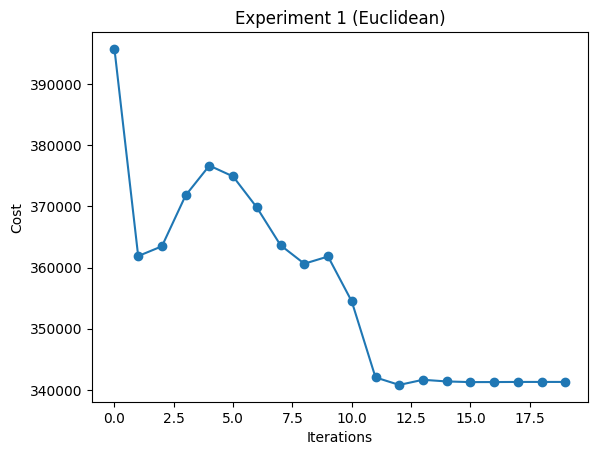

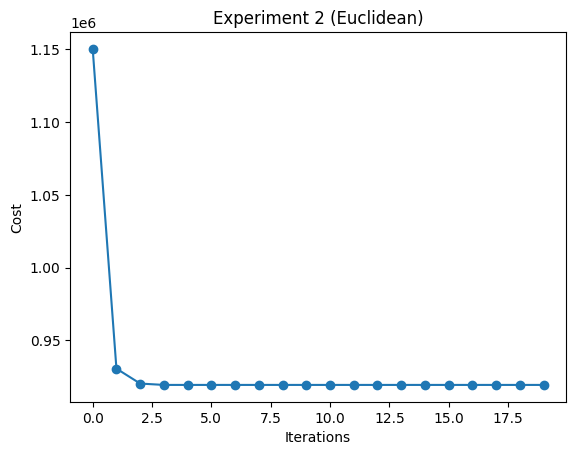

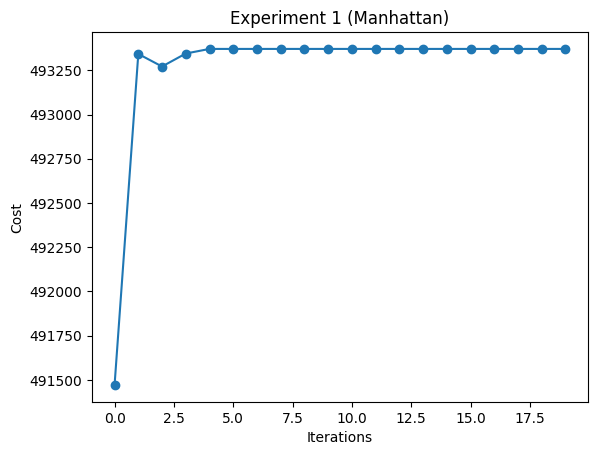

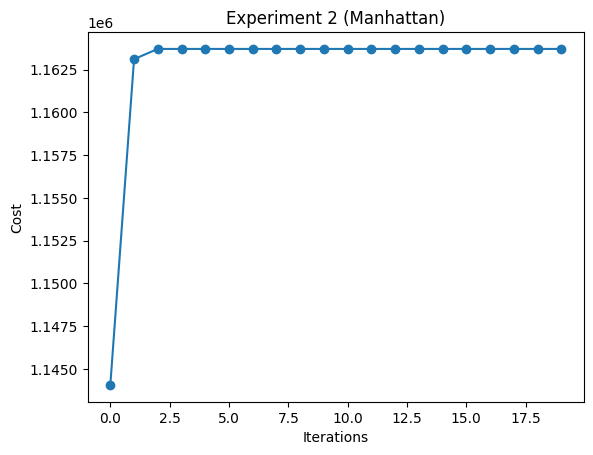

In [1]:
1.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def kmeans(data, k, centers, max_iter, dist_func):
    costs = []
    for _ in range(max_iter):
        assignments = []
        cost = 0
        for x in data:
            distances = [dist_func(x, c) for c in centers]
            cluster = np.argmin(distances)
            assignments.append(cluster)
            cost += np.min(distances)
        costs.append(cost)
        for j in range(k):
            indices = [i for i, a in enumerate(assignments) if a == j]
            cluster_data = data[indices]
            cluster_mean = np.mean(cluster_data, axis=0)
            centers[j] = cluster_mean
    return centers, assignments, costs

def plot_cost(iterations, costs, title):
    plt.plot(range(iterations), costs, marker='o')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

#load data
data = np.loadtxt('text_data.txt')
centers_1 = np.loadtxt('centers_1.txt')
centers_2 = np.loadtxt('centers_2.txt')

#c) run algo w euclidean distance
centers_1_final, assignments_1, costs_1 = kmeans(data, k=4, centers=centers_1, max_iter=20, dist_func=euclidean_distance)
centers_2_final, assignments_2, costs_2 = kmeans(data, k=4, centers=centers_2, max_iter=20, dist_func=euclidean_distance)

#d) plot cost as f of iterations
plot_cost(20, costs_1, 'Experiment 1 (Euclidean)')
plot_cost(20, costs_2, 'Experiment 2 (Euclidean)')

#e)Run algo w manhattan distance
centers_1_final_manhattan, assignments_1_manhattan, costs_1_manhattan = kmeans(data, k=4, centers=centers_1, max_iter=20, dist_func=manhattan_distance)
centers_2_final_manhattan, assignments_2_manhattan, costs_2_manhattan = kmeans(data, k=4, centers=centers_2, max_iter=20, dist_func=manhattan_distance)

#f)plot cost as f of iterations
plot_cost(20, costs_1_manhattan, 'Experiment 1 (Manhattan)')
plot_cost(20, costs_2_manhattan, 'Experiment 2 (Manhattan)')





the first euclidean experiment with random centers is the only one that decreases, then increases and decreases again until its stable. The algorithm is moving towards a better solution. The second euclidean experiement and the first manhattan experiement both find solutions quickly and converge to local minimums. the second manhattan experiment with distance centers increases slightly and then stabilizes. this is weird because you'd generally expect k means to decrease over time, but maybe the initial centers were already good and the little increase in cost could just be slight fine tuning the cluster centers.

   Unnamed: 0       State  Population  ViolentCrimeTotal  Murder  Rape  \
0           1     Alabama     4708708              21179     323  1504   
1           2      Alaska      698473               4421      22   512   
2           3     Arizona     6595778              26929     354  2110   
3           4    Arkansas     2889450              14959     179  1368   
4           5  California    36961664             174459    1972  8713   

   Robbery  Assault  PropertyCrimeTotal  Burglary  ...  MurderRate  RapeRate  \
0     6259    13093              177629     48837  ...         6.9      31.9   
1      655     3232               20577      3597  ...         3.1      73.3   
2     8099    16366              234582     53412  ...         5.4      32.0   
3     2582    10830              109038     34764  ...         6.2      47.3   
4    64093    99681             1009614    230137  ...         5.3      23.6   

   RobberyRate  AssaultRate  PropertyCrimeRate  BurglaryRate  \
0        1

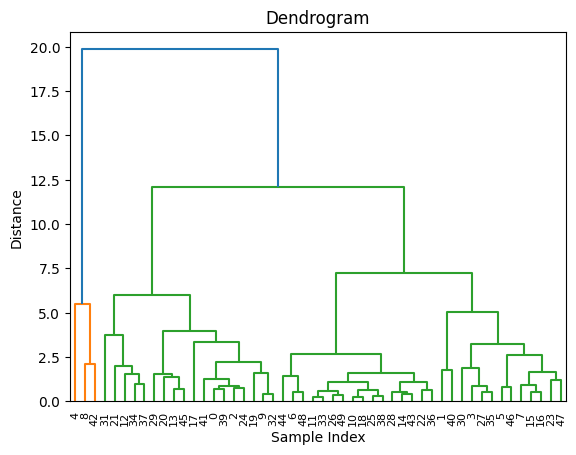

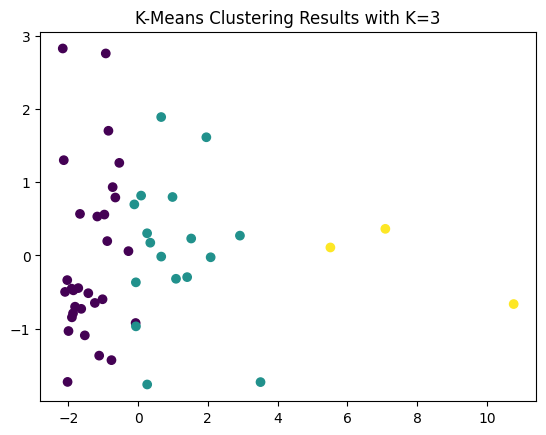

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('US_State_Crime.csv')

print(df.head())
print(df.describe())

numerical_cols = ['Murder', 'Rape', 'Robbery', 'Assault', 'Population', 'ViolentCrimeTotal', 'MurderRate', 'RapeRate']  # Adjust this based on your actual dataset
df_numerical = df[numerical_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

pca = PCA()
df_pca = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
print('Explained variance by each component:', explained_variance)

#b) 
covariance_matrix = df_numerical.cov()
print("\nCovariance Matrix:")
print(covariance_matrix)

correlation_matrix = df_numerical.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

#c)
agglomerative_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
cluster_labels = agglomerative_clustering.fit_predict(df_pca)

linkage_matrix = linkage(df_pca, method='ward')  

dendrogram(linkage_matrix)

#d) 
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#e) 
kmeans = KMeans(n_clusters=3, random_state=3, n_init=20)  # Adjust the number of clusters based on your specific needs
kmeans.fit(df_pca)
kmeans_labels = kmeans.labels_

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results with K=3')
plt.show()


Explained variance by each component: [7.48781611e-01 1.37128377e-01 9.56350250e-02 9.45690375e-03
 6.66539941e-03 1.43713230e-03 8.95551341e-04 2.07327321e-33]

Covariance Matrix:
                         Murder          Rape       Robbery       Assault  \
Murder             1.394510e+05  6.362999e+05  4.247337e+06  7.249306e+06   
Rape               6.362999e+05  3.319746e+06  1.953711e+07  3.397397e+07   
Robbery            4.247337e+06  1.953711e+07  1.357907e+08  2.242584e+08   
Assault            7.249306e+06  3.397397e+07  2.242584e+08  4.045368e+08   
Population         2.457534e+09  1.158478e+10  7.824186e+10  1.295703e+11   
ViolentCrimeTotal  1.227239e+07  5.746712e+07  3.838336e+08  6.700186e+08   
MurderRate         3.832414e+02  1.301274e+03  7.884612e+03  1.746624e+04   
RapeRate          -9.085443e+02 -1.435855e+03 -3.311484e+04 -4.035910e+04   

                     Population  ViolentCrimeTotal    MurderRate      RapeRate  
Murder             2.457534e+09       1.2272

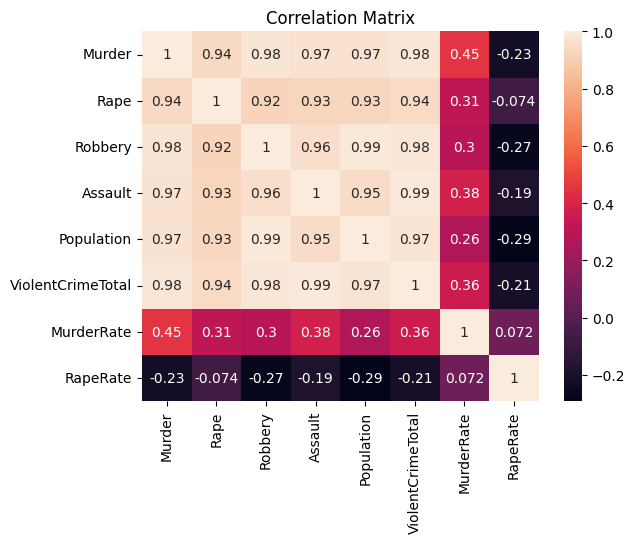

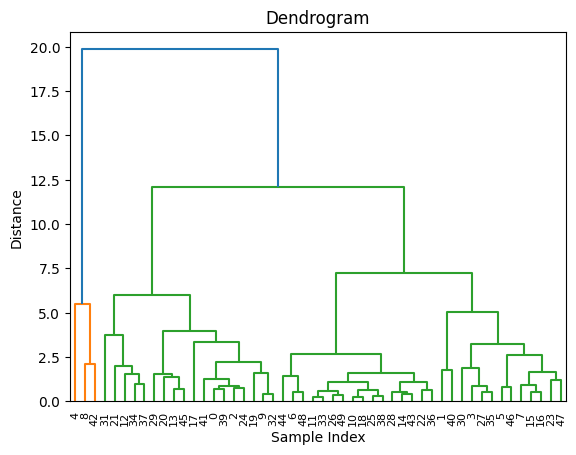

I chose 'Murder', 'Rape', 'Robbery', 'Assault', 'Population', 'ViolentCrimeTotal', 'MurderRate', 'RapeRate' to look at violent crime. 

it seems like the only variables that are highly correlated are murder rate and rape rate. However, the correlation between ‘Murder’ and ‘Rape’ is not high, which might suggest that the absolute numbers of these crimes don’t vary together as much as their rates do. This could be due to differences in population size between states.

there's 3 clusters. There are 3 different colors in the dendogram, and there's 3 different succinct sections, suggesting three clusters. 

K-means is a simple and efficient algorithm that works well when the clusters are roughly spherical and evenly sized

